In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("Pokemon.csv",encoding='utf-8')
print(df.head())

# 初步验证数据结构（匹配实验指导2.3节提及的字段：编号、名称、类型、基本属性等）
print(f"数据总行数：{len(df)} | 总列数：{len(df.columns)}")
print(f"\n数据列名：")
print(df.columns.tolist())


   #                   Name Type 1  Type 2 Total  HP Attack Defense Sp. Atk  \
0  1              Bulbasaur  Grass  Poison   318  45     49      49      65   
1  2                Ivysaur  Grass  Poison   405  60     62      63      80   
2  3               Venusaur  Grass  Poison   525  80     82      83     100   
3  3  VenusaurMega Venusaur  Grass  Poison   625  80    100     123     122   
4  4             Charmander   Fire     NaN   309  39     52      43      60   

  Sp. Def Speed Generation Legendary  
0      65    45          1     FALSE  
1      80    60          1     FALSE  
2     100    80          1     FALSE  
3     120    80          1     FALSE  
4      50    65          1     FALSE  
数据总行数：810 | 总列数：13

数据列名：
['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [16]:
import pandas as pd
import numpy as np

# 无意义数据行统计
attr_cols = ["#", "Name", "Type 1", "Type 2", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]

# 1. 统计所有空行，包括用空格等填充的伪空行
def is_empty_row(row):
    for val in row:
        # 排除“非NaN且非空白字符串”的情况
        if not (pd.isna(val) or str(val).strip() == ""):
            return False
    return True

empty_row_mask = df.apply(is_empty_row, axis=1)
all_empty_rows = df[empty_row_mask]

print(f"1. 空行统计（含伪空行）：")
print(f"   - 空行总数：{len(all_empty_rows)}行")
print(f"   - 空行索引：{all_empty_rows.index.tolist()}")



# 2. 统计无定义行（属性值为"undefined"的行）
undefined_rows = pd.DataFrame()
for col in attr_cols:
    try:
        # 逐个元素判断是否为"undefined"
        mask = df[col].apply(lambda x: str(x).strip() == "undefined")
        col_undefined = df[mask]
        if len(col_undefined) > 0:
            undefined_rows = pd.concat([undefined_rows, col_undefined], ignore_index=False).drop_duplicates()
    except Exception as e:
        print(f"   - 处理列 {col} 时跳过：{str(e)}")

print(f"\n2. 无定义行统计（属性值为'undefined'）：")
print(f"   - 无定义行数量：{len(undefined_rows)}行")
if len(undefined_rows) > 0:
    print(f"   - 无定义行索引：{undefined_rows.index.tolist()[:5]}")


1. 空行统计（含伪空行）：
   - 空行总数：3行
   - 空行索引：[408, 808, 809]

2. 无定义行统计（属性值为'undefined'）：
   - 无定义行数量：2行
   - 无定义行索引：[806, 771]


In [18]:
# 1. 检测完全重复行
duplicate_rows = df[df.duplicated(keep=False)]
print(f"1. 完全重复行数量：{len(duplicate_rows)}")

if len(duplicate_rows) > 0:
    print(f"   - 重复行索引：{duplicate_rows.index.tolist()}")
    print(f"   - 重复行分组详情：")
    duplicate_groups = duplicate_rows.groupby("#")
    for group_id, group_data in duplicate_groups:
        if len(group_data) > 1:
            print(f"\n     编号{group_id}的重复行（共{len(group_data)}行）：")
            # 显示指导书2.4节关注的核心字段
            print(group_data[["#", "Name", "Type 1", "Type 2", "Total", "HP", "Attack"]])
else:
    print("   - 无完全重复行")

# 3. 统计重复行占比（指导书“数据质量评估”维度）
dup_ratio = (len(duplicate_rows) / len(df)) * 100 if len(df) > 0 else 0
print(f"\n2. 重复行占比：{dup_ratio:.2f}%")

1. 完全重复行数量：12
   - 重复行索引：[14, 15, 21, 23, 184, 185, 186, 187, 806, 807, 808, 809]
   - 重复行分组详情（按宝可梦编号#聚合，符合指导书分析逻辑）：

     编号11的重复行（共2行）：
     #     Name Type 1 Type 2 Total  HP Attack
14  11  Metapod    Bug    NaN   205  50     20
15  11  Metapod    Bug    NaN   205  50     20

     编号168的重复行（共4行）：
       #     Name Type 1  Type 2 Total  HP Attack
184  168  Ariados    Bug  Poison   390  70     90
185  168  Ariados    Bug  Poison   390  70     90
186  168  Ariados    Bug  Poison   390  70     90
187  168  Ariados    Bug  Poison   390  70     90

     编号17的重复行（共2行）：
     #       Name  Type 1  Type 2 Total  HP Attack
21  17  Pidgeotto  Normal  Flying   349  63     60
23  17  Pidgeotto  Normal  Flying   349  63     60

     编号undefined的重复行（共2行）：
             #       Name     Type 1     Type 2      Total         HP  \
806  undefined  undefined  undefined  undefined  undefined  undefined   
807  undefined  undefined  undefined  undefined  undefined  undefined   

        Attack  
806  undef

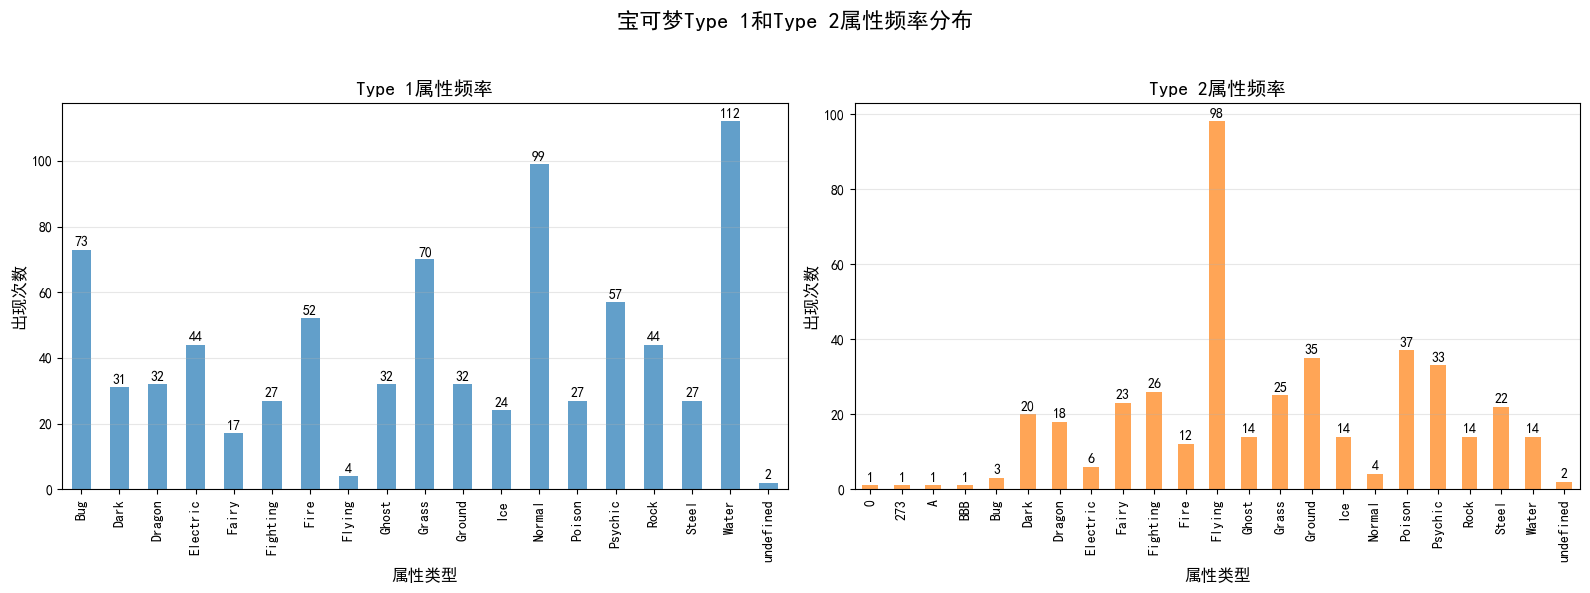

In [33]:
#字段类属性异常可视化分析
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv("Pokemon.csv")

# 统计Type 1和Type 2的频率（排除NaN值）
type1_counts = df["Type 1"].dropna().value_counts().sort_index()
type2_counts = df["Type 2"].dropna().value_counts().sort_index()

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("宝可梦Type 1和Type 2属性频率分布", fontsize=16)

# 绘制Type 1柱状图
type1_counts.plot(kind="bar", ax=ax1, color="#1f77b4", alpha=0.7)
ax1.set_title("Type 1属性频率", fontsize=14)
ax1.set_xlabel("属性类型", fontsize=12)
ax1.set_ylabel("出现次数", fontsize=12)
ax1.grid(axis="y", alpha=0.3)
# 在柱形上标注数量
for i, count in enumerate(type1_counts):
    ax1.text(i, count + 1, str(count), ha="center", fontsize=10)

# 绘制Type 2柱状图
type2_counts.plot(kind="bar", ax=ax2, color="#ff7f0e", alpha=0.7)
ax2.set_title("Type 2属性频率", fontsize=14)
ax2.set_xlabel("属性类型", fontsize=12)
ax2.set_ylabel("出现次数", fontsize=12)
ax2.grid(axis="y", alpha=0.3)
# 在柱形上标注数量
for i, count in enumerate(type2_counts):
    ax2.text(i, count + 1, str(count), ha="center", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局，避免标题重叠
plt.show()

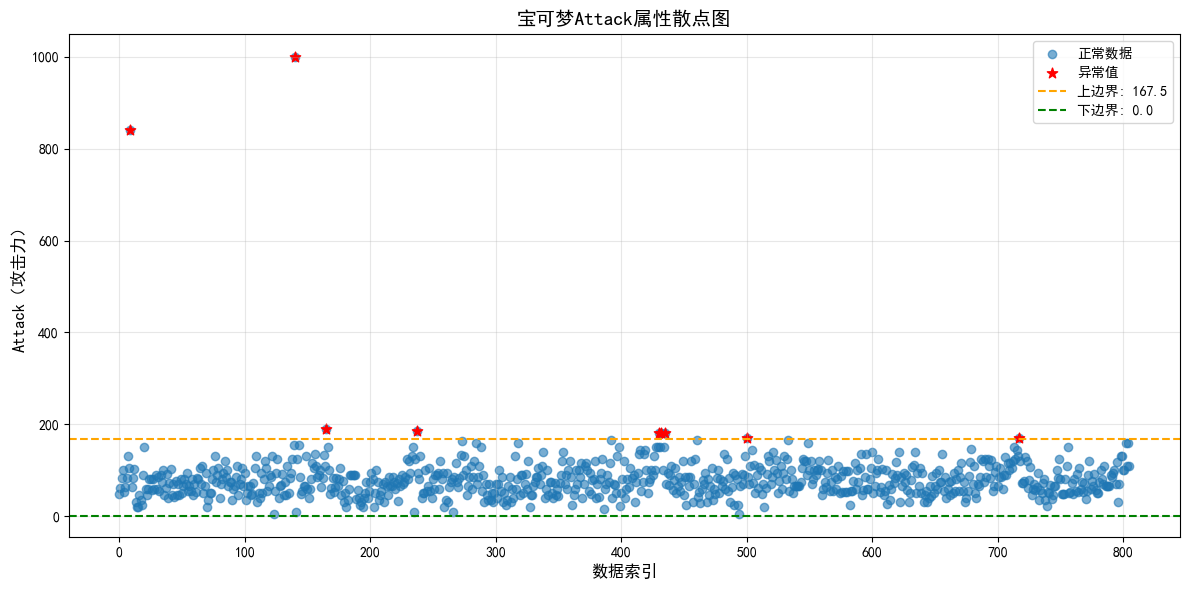

In [31]:
#数值类型异常值可视化分析，以attack攻击力为例
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv("Pokemon.csv")

df['Attack'] = pd.to_numeric(df['Attack'], errors='coerce')

# 计算IQR边界用于标记异常值（过滤NaN值）
attack_values = df['Attack'].dropna()
q1 = attack_values.quantile(0.25)
q3 = attack_values.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = max(0, q1 - 1.5 * iqr)  # 攻击力不能为负

# 标记异常值
abnormal = df[(df['Attack'] < lower_bound) | (df['Attack'] > upper_bound)]

# 绘制散点图
plt.figure(figsize=(12, 6))
# 正常数据点（排除NaN值）
valid_data = df.dropna(subset=['Attack'])
plt.scatter(valid_data.index, valid_data['Attack'], alpha=0.6, color="#1f77b4", label="正常数据")
# 异常值点
plt.scatter(abnormal.index, abnormal['Attack'], color="red", marker="*", s=60, label="异常值")
# 上下边界线
plt.axhline(y=upper_bound, color="orange", linestyle="--", label=f"上边界: {upper_bound:.1f}")
plt.axhline(y=lower_bound, color="green", linestyle="--", label=f"下边界: {lower_bound:.1f}")

plt.title("宝可梦Attack属性散点图", fontsize=14)
plt.xlabel("数据索引", fontsize=12)
plt.ylabel("Attack（攻击力）", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()